In [25]:
import pandas as pd 
import numpy as np
from scipy import stats
from  scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

## TASK 1

In [26]:

x1 = pd.ExcelFile('distrib.xls')
ds = x1.parse('Лист1')
un = ds['Un']
print('   Descriptive statistics')
print('Min = ', un.min(), ',  Max = ', un.max())
print('Average = ', un.mean())
print('Range = ', un.max()-un.min())
print('Asymmetry = ', un.skew())
print('Quantiles ')
print(un.quantile([0.25, 0.5, 0.75]))


   Descriptive statistics
Min =  2.023987548448134 ,  Max =  5.6229132969146
Average =  3.51905982645141
Range =  3.598925748466466
Asymmetry =  0.22669753766472464
Quantiles 
0.25    2.748924
0.50    3.462188
0.75    4.342700
Name: Un, dtype: float64


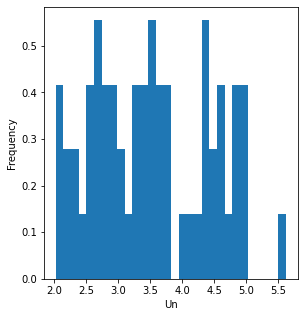

In [27]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(un, density=True, bins=30)
plt.ylabel('Frequency')
plt.xlabel('Un')
plt.show()

 Interval 
[  nan  :  nan  ]


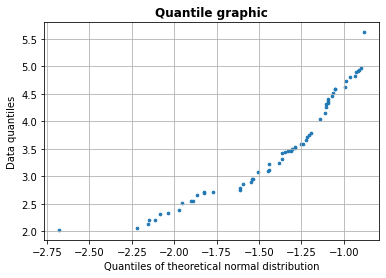

D =  nan , pval =  nan
The hypothesis is accepted


In [28]:
un = 1.0 * np.array(un)
n = len(un)
confidence = 0.95
m, se = np.mean(un), stats.sem(un)
print(' Interval ')
h = se * stats.t.ppf((1 + confidence) / 2., n-1)
print('[ ', m-h, ' : ', m+h, ' ]')
d = {0: sorted(stats.norm.rvs(loc=0, scale=1, size=len(un))), 1: sorted(un)}
pd.DataFrame(d).plot.scatter(0, 1, s=7, grid=True)
plt.plot([un.min(), un.max()], [un.min(), un.max()], linewidth=1)
plt.xlabel('Quantiles of theoretical normal distribution')
plt.ylabel('Data quantiles')
plt.title ('Quantile graphic', fontweight='semibold')
plt.show()
normed_data=(un - un.mean())/un.std()
D, pval = stats.kstest(normed_data, 'norm')
alfa = 0.05
if pval < alfa:
    print('D = ', D, ', pval = ', pval)
    print('The hypothesis is rejected')
else:
    print('D = ', D, ', pval = ', pval)
    print('The hypothesis is accepted')

## TASK 2

In [29]:
x = pd.ExcelFile('kaffee.xls')
ds = x.parse('Лист1')
k = ds[['treue','alter']]
print('Conjugacy table')
tb = pd.crosstab(k['treue'], k['alter'])
print(tb)
print('Chi-square test results')
kf = chi2_contingency(tb)
print('chisq-statistic={}, p-value={}, df={} expected_frep={}'.format(kf[0], kf[1], kf[2], kf[3]))

Conjugacy table
alter   1   2    3    4    5
treue                       
1      14  65  107  186  177
2      13  70   78  145  150
Chi-square test results
chisq-statistic=3.5000773688644897, p-value=0.4778665804801462, df=4 expected_frep=[[ 14.74925373  73.74626866 101.05970149 180.81492537 178.62985075]
 [ 12.25074627  61.25373134  83.94029851 150.18507463 148.37014925]]


## TASK 3

In [35]:
dx1 = x1 - x1.mean() 
dy = y - y.mean()
x1_hat = x1.mean()
n = x1.count()
var_x = sum((x1 - x1_hat) ** 2) / n
std_dev_x = np.sqrt(var_x)
y_hat = y.mean()
var_y = sum((y - y_hat) ** 2) / n
std_dev_y = np.sqrt(var_y)
k_cor = ((dx1 * dy).sum() / (dx1.count() - 1))/(std_dev_x * std_dev_y)
print('Dependency R, M')
print('Correlation = ',k_cor)


Dependency R, M
Correlation =  0.21856457060143192


In [39]:
dx2 = x2 - x2.mean() 
x2_hat = x2.mean()
var_x=sum((x2 - x2_hat) ** 2) / n
std_dev_x=np.sqrt(var_x)
k_cor = ((dx2 * dy).sum() / (dx2.count() - 1))/(std_dev_x * std_dev_y)
print('Dependency R, N')
print('Correlation = ',k_cor)

Dependency R, N
Correlation =  0.3448104539433652


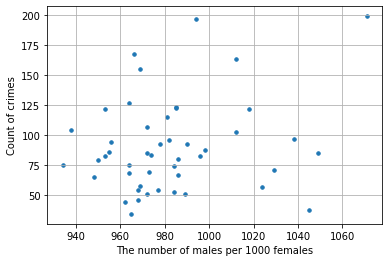

In [40]:
x = pd.ExcelFile('crime.xls')
ds = x.parse('Лист1')
cr = ds[['R','M','N']]
y = cr['R']
x1 = cr['M']
x2 = cr['N']
pd.DataFrame(np.array([x1, y]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('The number of males per 1000 females')
plt.ylabel('Count of crimes')
plt.show()

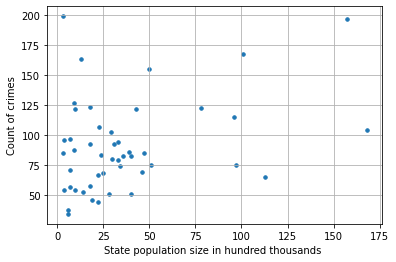

In [41]:
pd.DataFrame(np.array([x2, y]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('State population size in hundred thousands ')
plt.ylabel('Count of crimes')
plt.show()

## TASK 4